<a href="https://colab.research.google.com/github/krish2k03/Parkinson-disease-detection/blob/main/Parkinsonfinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import lightgbm as lgb
from sklearn import svm
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,precision_score,recall_score
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
parkinson_data = pd.read_csv('/content/parkinsons.csv')

<ipython-input-16-37669a0e5cc8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_matrix = parkinson_data.corr().abs()


                        MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  \
MDVP_Fo_Hz                1.000000     0.400985     0.596546   
MDVP_Fhi_Hz               0.400985     1.000000     0.084951   
MDVP_Flo_Hz               0.596546     0.084951     1.000000   
MDVP_Jitter_percentage    0.118003     0.102086     0.139919   
MDVP_Jitter_Abs           0.382027     0.029198     0.277815   
MDVP_RAP                  0.076194     0.097177     0.100519   
MDVP_PPQ                  0.112165     0.091126     0.095828   
Jitter_DDP                0.076213     0.097150     0.100488   
MDVP_Shimmer              0.098374     0.002281     0.144543   
MDVP_Shimmer_dB           0.073742     0.043465     0.119089   
Shimmer_APQ3              0.094717     0.003743     0.150747   
Shimmer_APQ5              0.070682     0.009997     0.101095   
MDVP_APQ                  0.077774     0.004937     0.107293   
Shimmer_DDA               0.094732     0.003733     0.150737   
NHR                       0.021981     0

<Axes: >

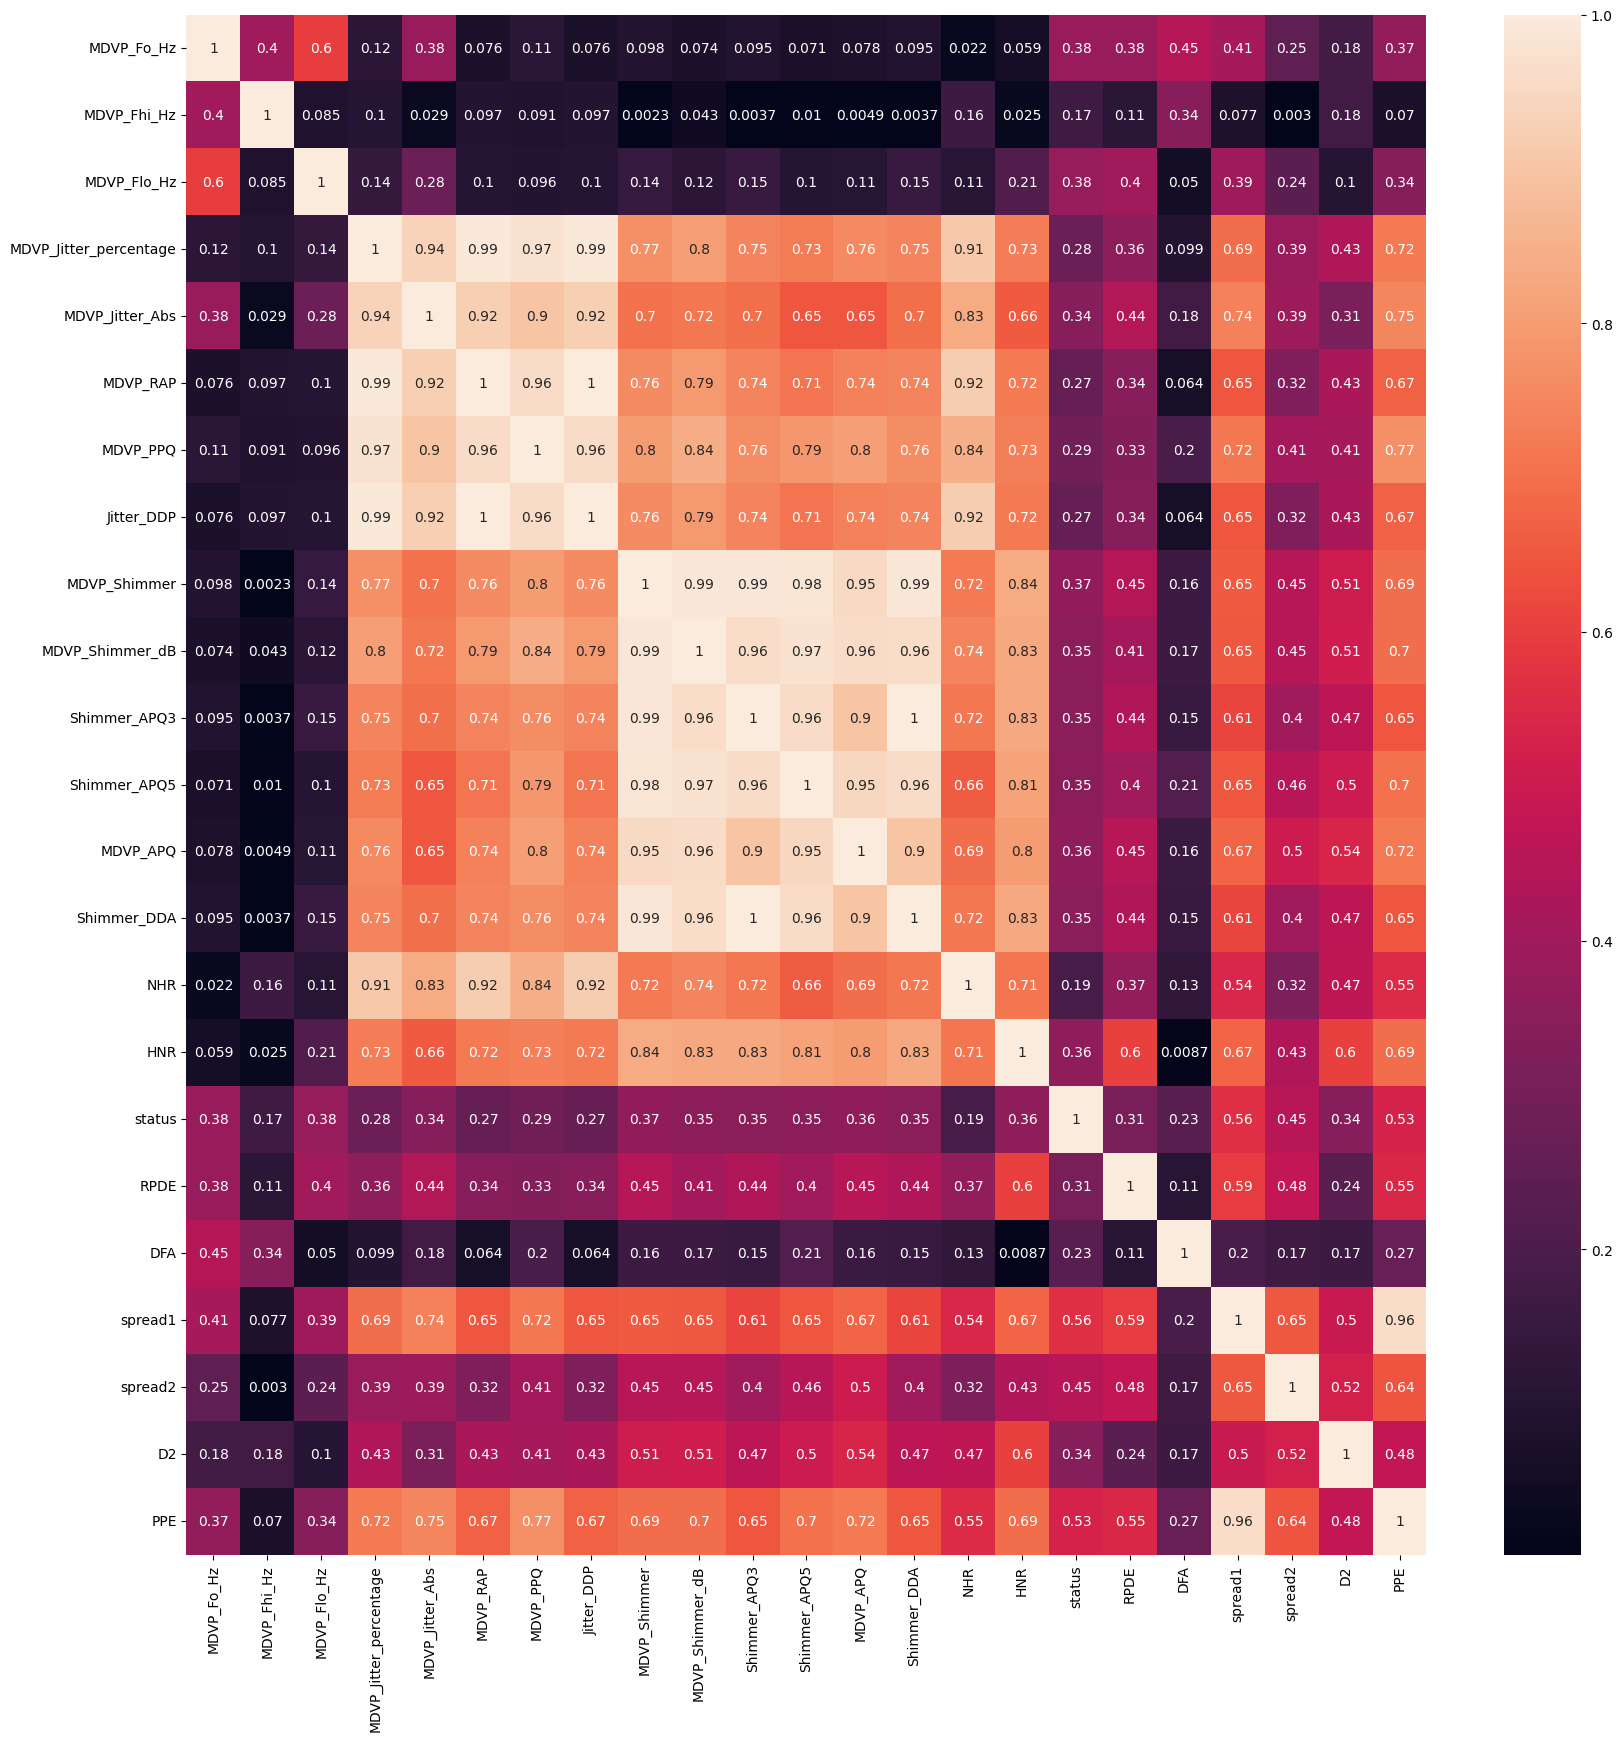

In [ ]:
cor_matrix = parkinson_data.corr().abs()
plt.figure(figsize=(20,20))
print(cor_matrix)
sns.heatmap(cor_matrix,annot=True)

In [ ]:
X = parkinson_data.drop(columns=['status','name'], axis=1)
Y = parkinson_data['status']

In [ ]:
parkinson_data = pd.DataFrame(X)
print(parkinson_data.head())

   MDVP_Fo_Hz  MDVP_Fhi_Hz  MDVP_Flo_Hz  MDVP_Jitter_percentage  \
0     119.992      157.302       74.997                 0.00784   
1     122.400      148.650      113.819                 0.00968   
2     116.682      131.111      111.555                 0.01050   
3     116.676      137.871      111.366                 0.00997   
4     116.014      141.781      110.655                 0.01284   

   MDVP_Jitter_Abs  MDVP_RAP  MDVP_PPQ  Jitter_DDP  MDVP_Shimmer  \
0          0.00007   0.00370   0.00554     0.01109       0.04374   
1          0.00008   0.00465   0.00696     0.01394       0.06134   
2          0.00009   0.00544   0.00781     0.01633       0.05233   
3          0.00009   0.00502   0.00698     0.01505       0.05492   
4          0.00011   0.00655   0.00908     0.01966       0.06425   

   MDVP_Shimmer_dB  ...  MDVP_APQ  Shimmer_DDA      NHR     HNR      RPDE  \
0            0.426  ...   0.02971      0.06545  0.02211  21.033  0.414783   
1            0.626  ...   0.04368 

In [ ]:
df1 =parkinson_data.drop(columns=['MDVP_Fhi_Hz', 'MDVP_Fo_Hz', 'MDVP_Flo_Hz', 'HNR'], axis=1)
print(); print(df1.head())


   MDVP_Jitter_percentage  MDVP_Jitter_Abs  MDVP_RAP  MDVP_PPQ  Jitter_DDP  \
0                 0.00784          0.00007   0.00370   0.00554     0.01109   
1                 0.00968          0.00008   0.00465   0.00696     0.01394   
2                 0.01050          0.00009   0.00544   0.00781     0.01633   
3                 0.00997          0.00009   0.00502   0.00698     0.01505   
4                 0.01284          0.00011   0.00655   0.00908     0.01966   

   MDVP_Shimmer  MDVP_Shimmer_dB  Shimmer_APQ3  Shimmer_APQ5  MDVP_APQ  \
0       0.04374            0.426       0.02182       0.03130   0.02971   
1       0.06134            0.626       0.03134       0.04518   0.04368   
2       0.05233            0.482       0.02757       0.03858   0.03590   
3       0.05492            0.517       0.02924       0.04005   0.03772   
4       0.06425            0.584       0.03490       0.04825   0.04465   

   Shimmer_DDA      NHR      RPDE       DFA   spread1   spread2        D2  \
0      0

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(df1, Y, test_size=0.2, random_state=7)

In [ ]:
model = lgb.LGBMClassifier()
model.fit(X_train, Y_train)

In [ ]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)


Accuracy score of training data :  1.0


In [ ]:
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of testing data : ', test_data_accuracy)

Accuracy score of testing data :  0.9230769230769231


In [ ]:
c_matrix=confusion_matrix(Y_test, X_test_prediction)
print(c_matrix)

[[ 5  2]
 [ 1 31]]


In [ ]:
tn,fp,fn,tp=c_matrix.ravel()
print(tn,fp,fn,tp)

5 2 1 31


In [ ]:
import pickle

In [ ]:
filename = 'trained_model1.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
# loading the saved model
loaded_model = pickle.load(open('trained_model1.sav', 'rb'))

In [ ]:
model1 = svm.SVC(kernel='linear')

In [ ]:
model1.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction1 = model1.predict(X_train)
training_data_accuracy1 = accuracy_score(Y_train, X_train_prediction1)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy1)

Accuracy score of training data :  0.8461538461538461


In [ ]:
X_test_prediction1 = model1.predict(X_test)
test_data_accuracy1 = accuracy_score(Y_test, X_test_prediction1)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy1)

Accuracy score of test data :  0.8717948717948718


In [ ]:
model3 = LogisticRegression(solver='liblinear', random_state=0)

In [ ]:
model3.fit(X_train, Y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
X_train_prediction3 = model3.predict(X_train)
training_data_accuracy3 = accuracy_score(Y_train, X_train_prediction3)
X_test_prediction3 = model3.predict(X_test)
test_data_accuracy3 = accuracy_score(Y_test, X_test_prediction3)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy3)
print('Accuracy score of test data : ', test_data_accuracy3)

Accuracy score of training data :  0.8269230769230769
Accuracy score of test data :  0.8717948717948718
